In [215]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
# preprocessing and metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.metrics import mean_squared_error,mean_absolute_error
# model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# regresson model
from sklearn.linear_model import LinearRegression, Ridge, Lasso, 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

warnings.filterwarnings('ignore')
## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

In [112]:
df=pd.read_csv('Bike Sharing.csv')

In [113]:
#Display the top 5 dataset
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,02-01-2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,03-01-2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,04-01-2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,05-01-2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [54]:
#Display the last 5 dataset
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,27-12-2012,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,28-12-2012,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,29-12-2012,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,30-12-2012,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,31-12-2012,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [55]:
## print shape of dataset with rows and columns
df.shape

(731, 16)

In [56]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [57]:
##chekck the info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


its show the number of rows, number of columns ,data types information,Memory usage,number of null values in each columns

In [58]:
###check the variance
df.var()

instant       4.459100e+04
season        1.233892e+00
yr            2.503420e-01
mnth          1.191570e+01
holiday       2.794071e-02
weekday       4.019171e+00
workingday    2.164421e-01
weathersit    2.969098e-01
temp          3.350767e-02
atemp         2.655635e-02
hum           2.028605e-02
windspeed     6.005920e-03
casual        4.714504e+05
registered    2.434400e+06
cnt           3.752788e+06
dtype: float64

In [59]:
###check the skewness
df.skew()

instant       0.000000
season       -0.000384
yr           -0.002742
mnth         -0.008149
holiday       5.654224
weekday       0.002742
workingday   -0.793147
weathersit    0.957385
temp         -0.054521
atemp        -0.131088
hum          -0.069783
windspeed     0.677345
casual        1.266454
registered    0.043659
cnt          -0.047353
dtype: float64

In [60]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Pandas Profiling to get the overview of the data

In [61]:
import pandas_profiling as pp
pp.ProfileReport(df)

## Missing Values

In [62]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

### Observation(s):

Here clearly visible there is no missing values in this dataset

In [63]:
df.columns 


Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [64]:
df['dteday']=pd.to_datetime(df.dteday)#datetme conversion
df['season']=df.season.astype('category')#categorical conversion
df['yr']=df.yr.astype('category')  
df['mnth']=df.mnth.astype('category')
df['holiday']=df.holiday.astype('category')
df['weekday']=df.weekday.astype('category')
df['workingday']=df.workingday.astype('category')
df['weathersit']=df.weathersit.astype('category')

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null datetime64[ns]
season        731 non-null category
yr            731 non-null category
mnth          731 non-null category
holiday       731 non-null category
weekday       731 non-null category
workingday    731 non-null category
weathersit    731 non-null category
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: category(7), datetime64[ns](1), float64(4), int64(4)
memory usage: 57.8 KB


In [67]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  16


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-02-01,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-03-01,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-04-01,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-05-01,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [68]:
# list of variables that contain year information
year_feature = [feature for feature in numerical_features if 'yr' in feature or 'weekday' in feature]

year_feature


['yr', 'weekday']

In [69]:
#lets explore the content of these years variables
for feature in year_feature:
    print(feature,df[feature].unique())

yr [0, 1]
Categories (2, int64): [0, 1]
weekday [6, 0, 1, 2, 3, 4, 5]
Categories (7, int64): [6, 0, 1, 2, 3, 4, 5]


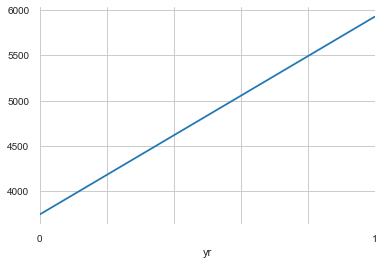

In [70]:
## Lets analyze the Temporal year Variables
## We will check whether there is a relation between year  and the count

df.groupby('yr')['cnt'].median().plot()
plt.xlabel=('yr ')
plt.ylabel=('Median cou Pntrice')
plt.title=("countprice vs yr")

### Univariate analysis of all variables Categorical data--> Season, Holiday, WorkingDay, Weather

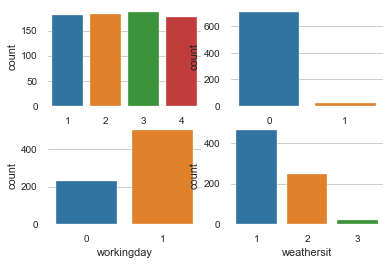

In [207]:
cat_names=['season', 'holiday', 'workingday', 'weathersit',]

i=0
for name in cat_names:
    i=i+1
    plt.subplot(2,2,i)
    sns.countplot(name,data=df) 
    
plt.show()

### Observation(s)

Holiday and working day look somewhat correlated. Can one of them be removed to avoid multi-collinearity

### Analysis for continuous data

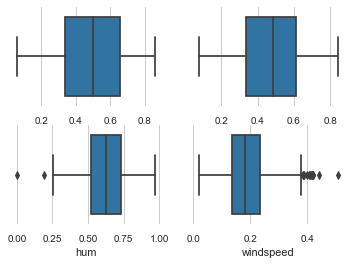

In [202]:
cont_names=['temp','atemp','hum','windspeed']

        
#sns.boxplot(train_df['season'])   
i=0
for name in cont_names:
    i=i+1
    plt.subplot(2,2,i)
    sns.boxplot(name,data=df) 
    
plt.show()

### Observation(s)

Temp, Atemp, humidity look normally distributed. However, windspeed has a lot of outliers which will be analysed further

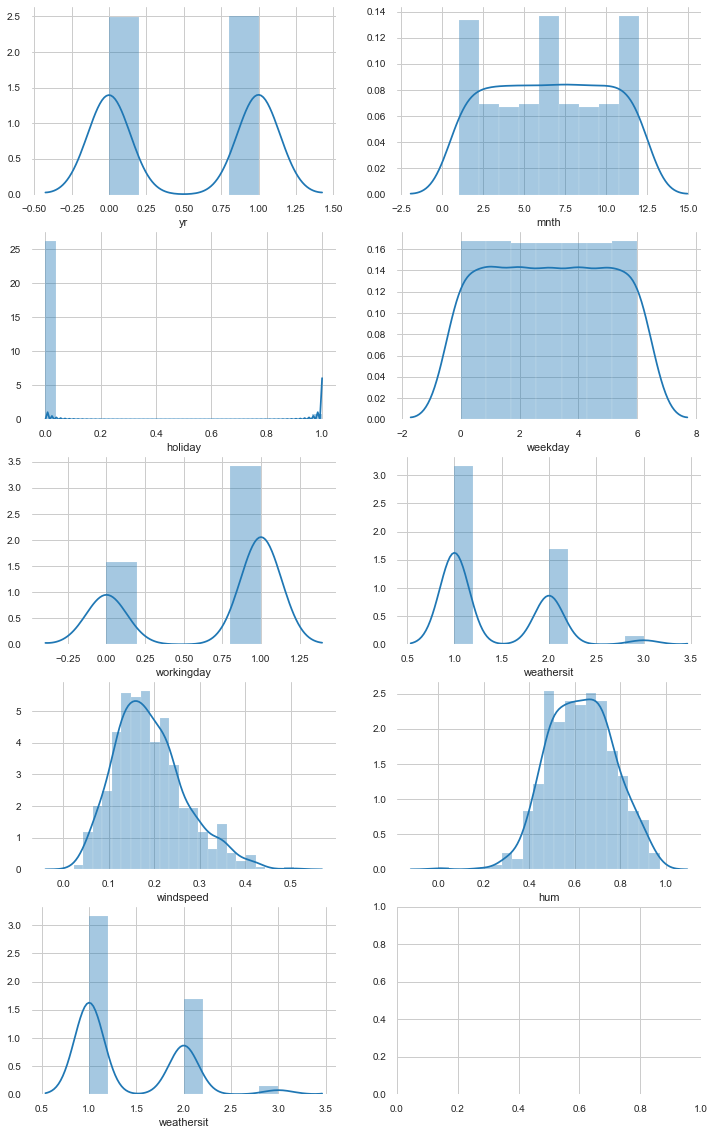

In [73]:
fig,ax2 = plt.subplots(5,2, figsize=(12,20))
sns.distplot(df['yr'],ax=ax2[0][0])
sns.distplot(df['mnth'],ax=ax2[0][1])
sns.distplot(df['holiday'],ax=ax2[1][0])
sns.distplot(df['weekday'],ax=ax2[1][1])
sns.distplot(df['workingday'],ax=ax2[2][0])
sns.distplot(df['weathersit'],ax=ax2[2][1])
sns.distplot(df['windspeed'],ax=ax2[3][0])
sns.distplot(df['hum'],ax=ax2[3][1])
sns.distplot(df['weathersit'],ax=ax2[4][0])

### Correlation

In [204]:
# correlation matrix
cor=df.corr()
cor

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.152638,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066


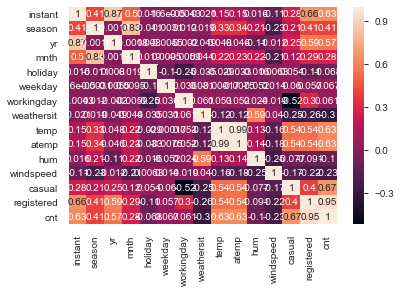

In [205]:
# correlation plot---heatmap
sns.heatmap(cor,annot=True)

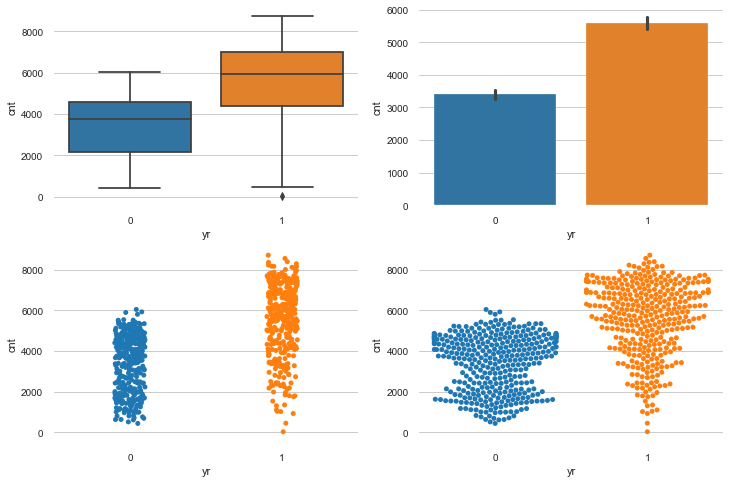

In [75]:
fig, ax2 = plt.subplots(2,2,figsize=(12,8))
sns.boxplot(x='yr',y='cnt',data=df,ax=ax2[0][0])
sns.barplot(df['yr'],df['cnt'],ax=ax2[0][1])
sns.stripplot(df['yr'],df['cnt'],jitter=True,ax=ax2[1][0])
sns.swarmplot(df['yr'],df['cnt'],ax=ax2[1][1])

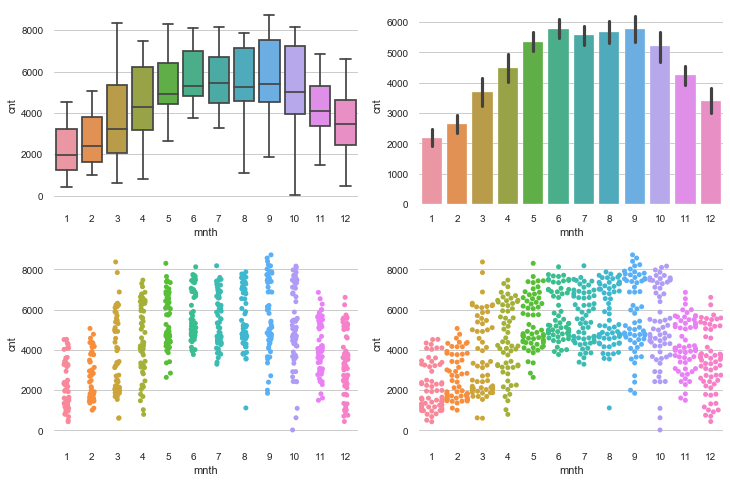

In [77]:
fig, ax2 = plt.subplots(2,2,figsize=(12,8))
sns.boxplot(x='mnth',y='cnt',data=df,ax=ax2[0][0])
sns.barplot(df['mnth'],df['cnt'],ax=ax2[0][1])
sns.stripplot(df['mnth'],df['cnt'],jitter=True,ax=ax2[1][0])
sns.swarmplot(df['mnth'],df['cnt'],ax=ax2[1][1])

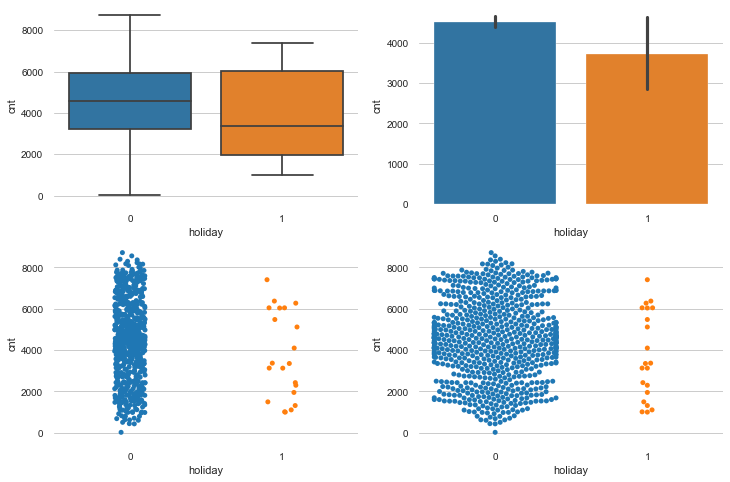

In [78]:
fig, ax2 = plt.subplots(2,2,figsize=(12,8))
sns.boxplot(x='holiday',y='cnt',data=df,ax=ax2[0][0])
sns.barplot(df['holiday'],df['cnt'],ax=ax2[0][1])
sns.stripplot(df['holiday'],df['cnt'],jitter=True,ax=ax2[1][0])
sns.swarmplot(df['holiday'],df['cnt'],ax=ax2[1][1])

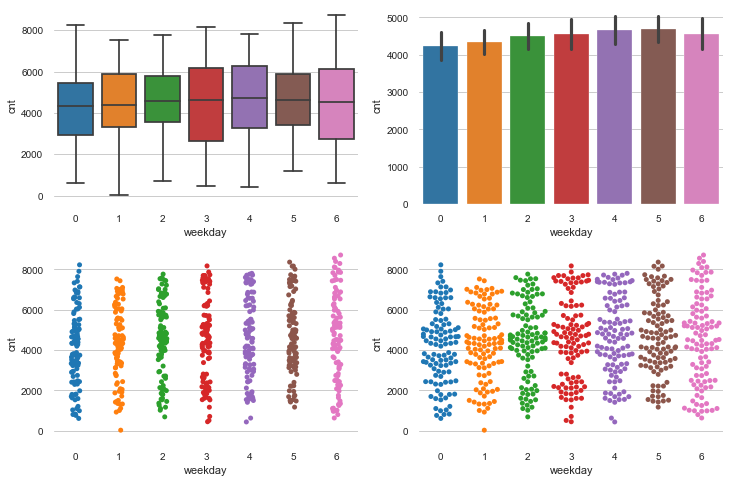

In [238]:
fig, ax2 = plt.subplots(2,2,figsize=(12,8))
sns.boxplot(x='weekday',y='cnt',data=df,ax=ax2[0][0])
sns.barplot(df['weekday'],df['cnt'],ax=ax2[0][1])
sns.stripplot(df['weekday'],df['cnt'],jitter=True,ax=ax2[1][0])
sns.swarmplot(df['weekday'],df['cnt'],ax=ax2[1][1])

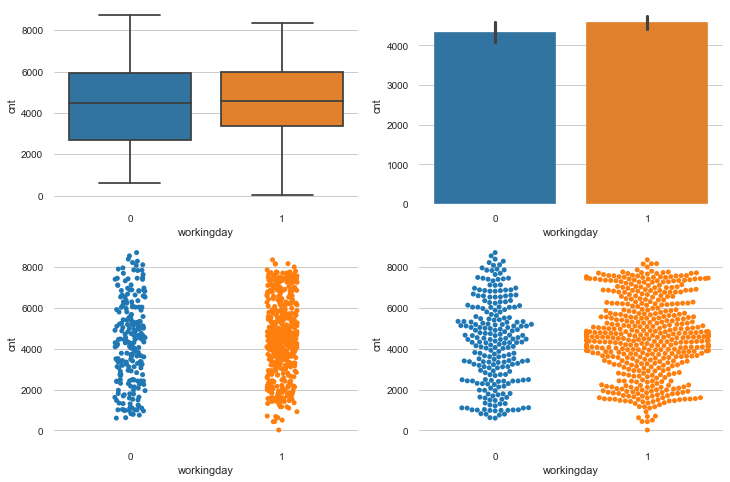

In [239]:
fig, ax2 = plt.subplots(2,2,figsize=(12,8))
sns.boxplot(x='workingday',y='cnt',data=df,ax=ax2[0][0])
sns.barplot(df['workingday'],df['cnt'],ax=ax2[0][1])
sns.stripplot(df['workingday'],df['cnt'],jitter=True,ax=ax2[1][0])
sns.swarmplot(df['workingday'],df['cnt'],ax=ax2[1][1])

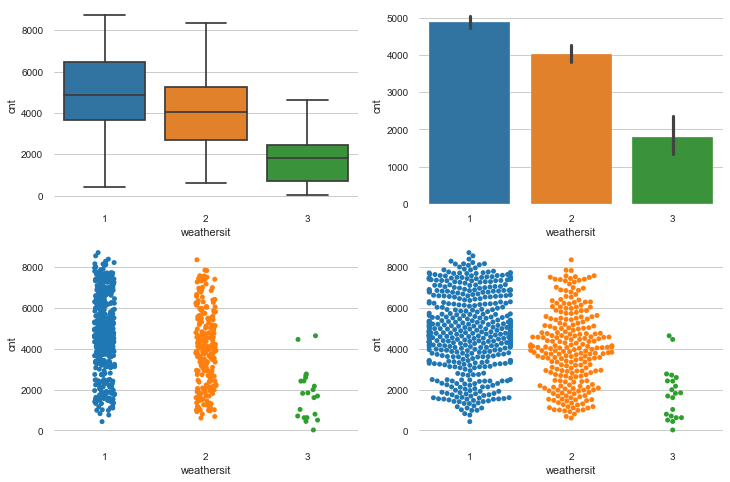

In [240]:
fig, ax2 = plt.subplots(2,2,figsize=(12,8))
sns.boxplot(x='weathersit',y='cnt',data=df,ax=ax2[0][0])
sns.barplot(df['weathersit'],df['cnt'],ax=ax2[0][1])
sns.stripplot(df['weathersit'],df['cnt'],jitter=True,ax=ax2[1][0])
sns.swarmplot(df['weathersit'],df['cnt'],ax=ax2[1][1])

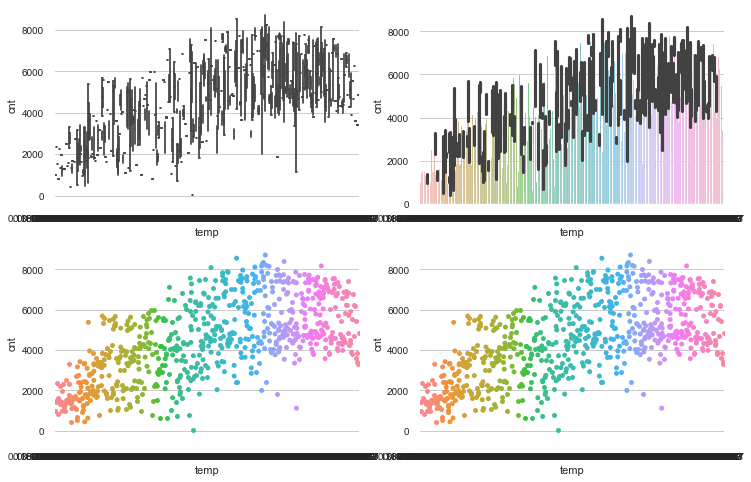

In [241]:
fig, ax2 = plt.subplots(2,2,figsize=(12,8))
sns.boxplot(x='temp',y='cnt',data=df,ax=ax2[0][0])
sns.barplot(df['temp'],df['cnt'],ax=ax2[0][1])
sns.stripplot(df['temp'],df['cnt'],jitter=True,ax=ax2[1][0])
sns.swarmplot(df['temp'],df['cnt'],ax=ax2[1][1])

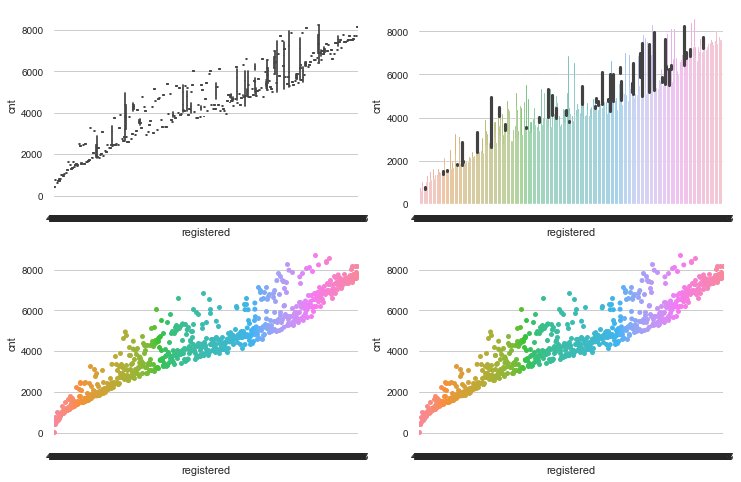

In [242]:
fig, ax2 = plt.subplots(2,2,figsize=(12,8))
sns.boxplot(x='registered',y='cnt',data=df,ax=ax2[0][0])
sns.barplot(df['registered'],df['cnt'],ax=ax2[0][1])
sns.stripplot(df['registered'],df['cnt'],jitter=True,ax=ax2[1][0])
sns.swarmplot(df['registered'],df['cnt'],ax=ax2[1][1])

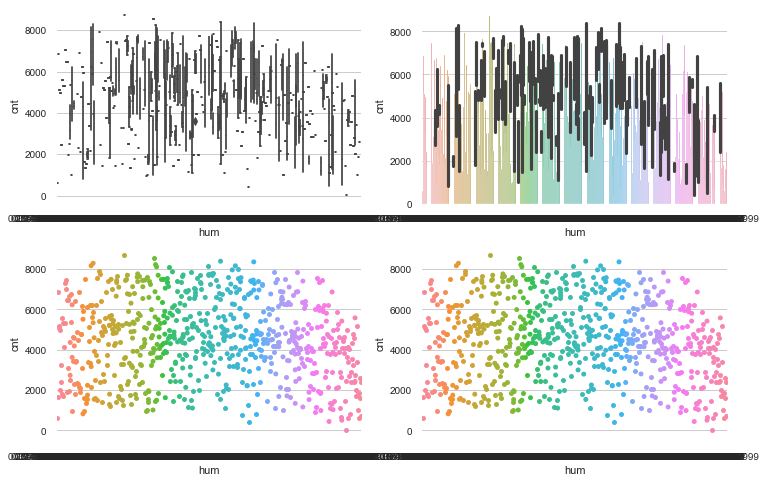

In [49]:
fig, ax2 = plt.subplots(2,2,figsize=(12,8))
sns.boxplot(x='hum',y='cnt',data=df,ax=ax2[0][0])
sns.barplot(df['hum'],df['cnt'],ax=ax2[0][1])
sns.stripplot(df['hum'],df['cnt'],jitter=True,ax=ax2[1][0])
sns.swarmplot(df['hum'],df['cnt'],ax=ax2[1][1])

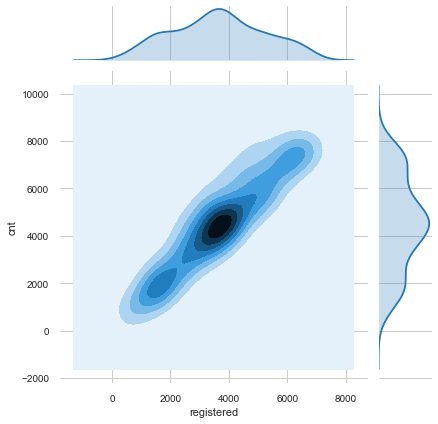

In [91]:
sns.jointplot(x='registered',y='cnt',data=df,kind='kde')
plt.show()

### Observation(s):    

It is clearly visible dark point show that the most point are register at 4000 and at the count is near about 5000

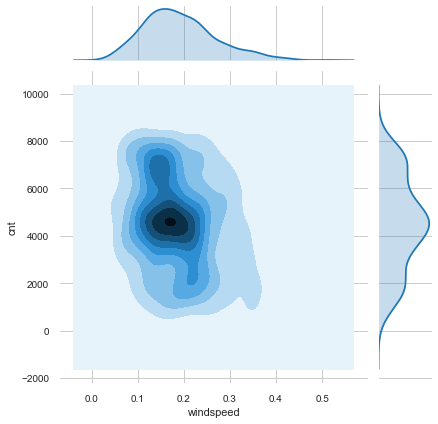

In [88]:
#2D contour probablity- density plot
sns.jointplot(x="windspeed",y='cnt',data=df,kind='kde')
plt.show();

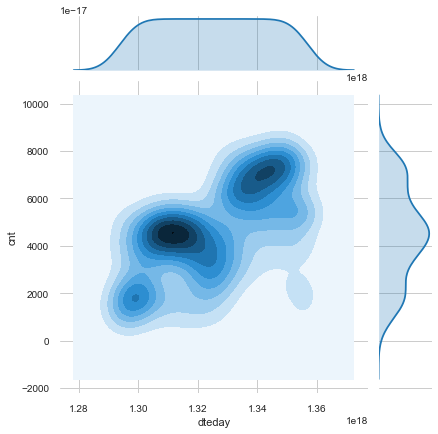

In [86]:
#2D contour probablity- density plot
sns.jointplot(x="dteday",y='cnt',data=df,kind='kde')
plt.show();

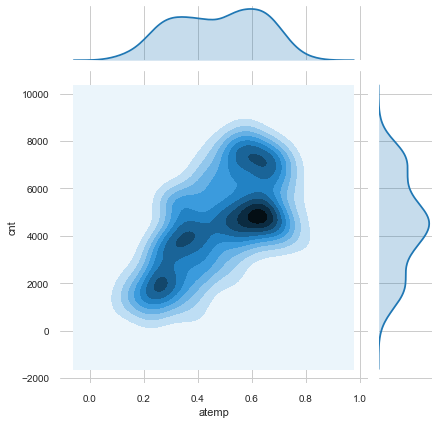

In [84]:
#2D contour probablity- density plot
sns.jointplot(x="atemp",y='cnt',data=df,kind='kde')
plt.show();

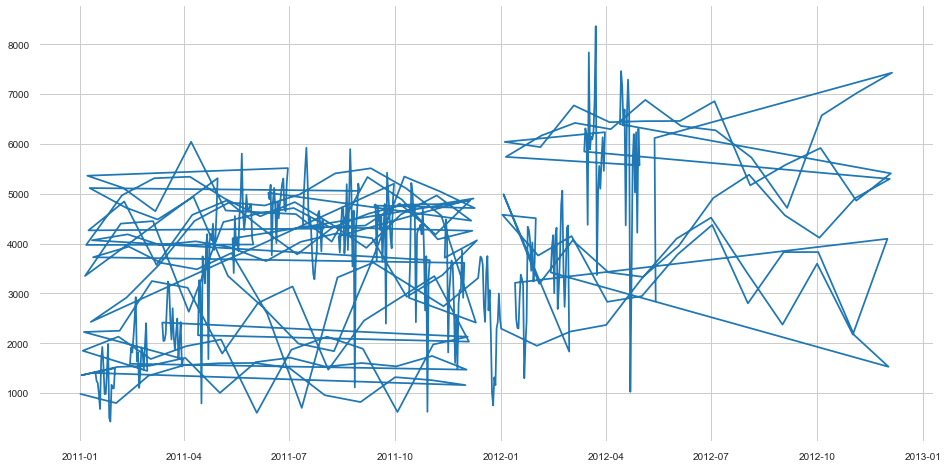

In [110]:
plt.figure(figsize=(16,8))
plt.plot(df["dteday"][0:500],df["cnt"][0:500])
plt.show()

### Multivariate Analysis

### Outliers

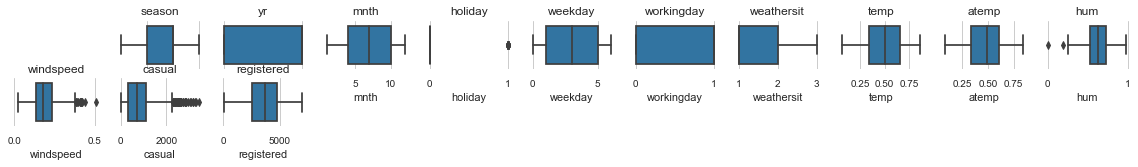

In [81]:
# boxplot

fig=plt.figure(figsize=(20,3))

for i in np.arange(2,15):
    data3=plt.subplot(3,11,i,title=df.columns[i])
    sns.boxplot(df[df.columns[i]])

### Visualizing multi-variate distribution of target variable with other categorical data

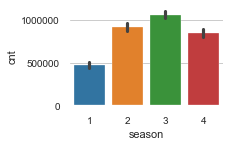

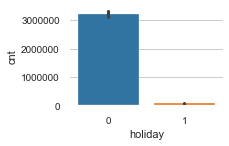

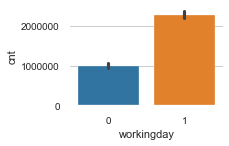

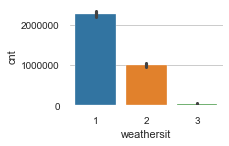

In [196]:
cat_names=['season', 'holiday', 'workingday', 'weathersit']
i=1
for name in cat_names:
    plt.subplot(2,2,i)
    sns.barplot(x=name,y='cnt',data=df,estimator=sum)
    i=i+1
    plt.show()

With weather 1,2 and season 2,3 and working days the bicycle rental count is maximum.
As per the analysis, we need to get rid off these variables to be inputted in our model:season. Working day has better correlation with count, weather,working day, hour,year has to be label encoded

df.hist(figsize=(15,10))

### Handle a Outliers

In [114]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

instant        365.000000
season           1.000000
yr               1.000000
mnth             6.000000
holiday          0.000000
weekday          4.000000
workingday       1.000000
weathersit       1.000000
temp             0.318333
atemp            0.270760
hum              0.210209
windspeed        0.098265
casual         780.500000
registered    2279.500000
cnt           2804.000000
dtype: float64


In [168]:
df_without_outliers =df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [169]:
df_without_outliers.dropna(inplace=True)

In [171]:
print(df.info())
print('*********************************************************************************')
print(df_without_outliers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
*********************************************************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 655 entries, 0 to 730
Data columns (total 16 columns):
instant       655 non-null int64
dteday        655 non-null object
season        655 non-null int64
yr

In [172]:
df_without_outliers.head(4)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,02-01-2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,03-01-2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,04-01-2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562


In [173]:
x=df_without_outliers.drop(['cnt','instant','dteday'],axis=1)
y=df_without_outliers['cnt']

In [174]:
x.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229


In [175]:
y.head(3)

0     985
1     801
2    1349
Name: cnt, dtype: int64

In [186]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [176]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.20)


In [177]:
y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)

In [179]:
from sklearn.preprocessing import MinMaxScaler
sc_x=MinMaxScaler()
sc_y=MinMaxScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.fit_transform(x_test)
y_train = sc_x.fit_transform(y_train)
y_test = sc_x.fit_transform(y_test)

In [184]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100)
rf.fit(x_train,y_train)
rf_prediction = rf.predict(x_test)

In [188]:
print('MSE:', metrics.mean_squared_error(y_test, rf_prediction))

MSE: 0.0004663806321634012


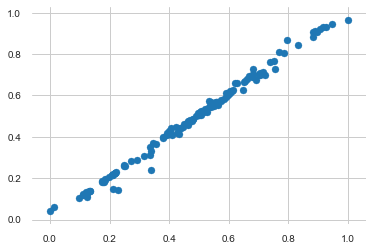

In [189]:
plt.scatter(y_test,rf_prediction)

In [221]:
rf.score(x_train,y_train)

0.9995249837588068

In [218]:
#predict the value
pred=rf.predict(x_test)
print("Predicted result price:",pred)
print("actual price",y_test)

Predicted result price: [0.44765544 0.22834336 0.90525261 0.44702885 0.37192249 0.33288844
 0.18629126 0.22483904 0.61958928 0.13136968 0.4101432  0.20452855
 0.68170593 0.57153878 0.18064917 0.21417529 0.67005269 0.12326578
 0.51510906 0.55103679 0.21878191 0.51831297 0.5718364  0.91353867
 0.53061592 0.84554868 0.44221578 0.23919705 0.86752609 0.10351199
 0.61215916 0.62672314 0.48687006 0.7005188  0.13827104 0.39360119
 0.50004052 0.58301574 0.47366892 0.56821455 0.36438326 0.39880663
 0.51787978 0.91960385 0.44072539 0.93256431 0.81016367 0.90935814
 0.45971657 0.61407545 0.11704237 0.66420452 0.57967997 0.4845223
 0.41616697 0.7291328  0.55782496 0.50410866 0.41811218 0.52581338
 0.12471275 0.68920728 0.35032715 0.47444076 0.44088676 0.21650444
 0.50660978 0.55612302 0.61054021 0.52083456 0.76487612 0.70981461
 0.30615801 0.14676243 0.22671189 0.18936036 0.18417199 0.46348361
 0.13933871 0.40858594 0.56972613 0.13731374 0.54385083 0.31228758
 0.60224926 0.71519398 0.54738995 0.285

In [220]:
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))


print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 0.014766847629158955
Mean squared error: 0.0004663806321634012
Root Mean Squared Error: 0.021595847567608944


In [222]:
#r2 score -> coefficient of determination

from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.990753027190432


In [229]:
from sklearn.model_selection import cross_val_score

In [232]:
cross_val=cross_val_score(rf,x,y,cv=10,scoring='r2')

In [233]:
print(cross_val)

[0.93949932 0.95748638 0.96312495 0.98908045 0.99108122 0.98871998
 0.98570771 0.98133315 0.96413709 0.97755392]


In [235]:
import pickle
#save the traind model
saved_model=pickle.dumps(rf)
#Load the pickel data
rf_from_pickle=pickle.loads(saved_model)

### Observation(s):

RandomForestRegressor selecect beacuse its gives a good score